# UFood Marketing Analysis

The objectives of the analysis will answer the below questions and utilize a predictive model to attempt to improve the performance of marketing campaigns.

1. Provide insights on the characteristic features of respondents;
2. Describe a customer segmentation based on customer behavior;
3. Visualize data and provide reasoning behind discoveries;
4. Prediction to customer responses.


# Dataset Definitions

AcceptedCmp1            1 if customer accepted offer in the 1st campaign, 0 otherwise
AcceptedCmp2            1 if customer accepted offer in the 2nd campaign, 0 otherwise
AcceptedCmp3            1 if customer accepted offer in the 3rd campaign, 0 otherwise
AcceptedCmp4            1 if customer accepted offer in the 4th campaign, 0 otherwise
AcceptedCmp5            1 if customer accepted offer in the 6th campaign, 0 otherwise
Response (target)       1 if customer accepted offer in the last campaign, 0 otherwise
Complain                1 if customer complained in the last two years
DtCustomer              date of customer's enrollment with the company
Education               customer's level of education
Marital                 customer's marital status
Kidhome                 number of small children in customer's household
Teenhome                number of teenagers in customer's household
Income                  customer's yearly household income
MntFishProducts         amount spent on fish products in the last two years
MntMeatProducts         amount spent on meat products in the last two years
MntFruit                amount spent on fruit products in the last two years
MntSweetProducts        amount spent on sweet products in the last two years
MntWines                amount spent on wines products in the last two years
MntGoldProds            amount spent on gold products in the last two years
NumDealsPurchases       number of purchases made with discount
NumCatalogPurchases     number of purchases made using catalogs
NumStorePurchases       number of purchases made directly in stores
NumWebPurchases         number of purchases made through company's website
NumWebVisitsMonth       number of visits to company's  website in the last month
Recency                 number of days since last purchase

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Import sklearn for prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Read Data

In [3]:
food = pd.read_csv(r'C:\Users\DL_Jo\Downloads\u_food_marketing.csv')

# Exploratory Data Analysis

In [4]:
food.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [5]:
food.describe(include='all')

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

In [6]:
#Set Options to change the max row and column value
pd.set_option('display.max.rows', 2300)
pd.set_option('display.max.columns', 50)

In [7]:
food

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      58138        0         0       58       635         88   
1      46344        1         1       38        11          1   
2      71613        0         0       26       426         49   
3      26646        1         0       26        11          4   
4      58293        1         0       94       173         43   
5      62513        0         1       16       520         42   
6      55635        0         1       34       235         65   
7      33454        1         0       32        76         10   
8      30351        1         0       19        14          0   
9       5648        1         1       68        28          0   
10      7500        0         0       59         6         16   
11     63033        0         0       82       194         61   
12     59354        1         1       53       233          2   
13     17323        0         0       38         3         14   
14     82800        0         0       23      1006         22   
15     41850        1         1       51        53          5   
16     37760        0         0       20        84          5   
17     76995        0         1       91      1012         80   
18     33812        1         0       86         4         17   
19     37040        0         0       41        86          2   
20      2447        1         0       42         1          1   
21     58607        0         1       63       867          0   
22     65324        0         1        0       384          0   
23     40689        0         1       69       270          3   
24     18589        0         0       89         6          4   
25     53359        1         1        4       173          4   
26     38360        1         0       26        36          2   
27     84618        0         0       96       684        100   
28     10979        0         0       34         8          4   
29     38620        0         0       56       112         17   
30     40548        0         1       31       110          0   
31     46610        0         2        8        96         12   
32     68657        0         0        4       482         34   
33     49389        1         1       55        40          0   
34     67353        0         1       37       702         17   
35     23718        1         0       76         6          3   
36     42429        0         1       99        55          0   
37     48948        0         0       53       437          8   
38     80011        0         1        3       421         76   
39     20559        1         0       88        13          1   
40     21994        0         1        4         9          0   
41      7500        1         0       19         3          1   
42     79941        0         0       72       123        164   
43      7500        0         0       24         3         18   
44     41728        1         0       92        13          6   
45     72550        1         1       39       826         50   
46     65486        0         1       29       245         19   
47     79143        0         0        2       650         37   
48     35790        1         0       54        12          6   
49     82582        0         0       54       510        120   
50     66373        1         1       57       328          9   
51     82384        0         0       55       984         51   
52     70287        0         0       30       295         35   
53     27938        1         0       31        13          0   
54     55954        0         1       63       447          0   
55     75777        0         0       12       712         26   
56     66653        1         1       18       452         18   
57     61823        0         1       26       523          7   
58     67680        0         1        8       546          0   
59     70666        0         0       29       398         40   
60     25721        1         0       75 

In [8]:
# Check to see if dataset contains any missing values
food.isna().any()

Income                  False
Kidhome                 False
Teenhome                False
Recency                 False
MntWines                False
MntFruits               False
MntMeatProducts         False
MntFishProducts         False
MntSweetProducts        False
MntGoldProds            False
NumDealsPurchases       False
NumWebPurchases         False
NumCatalogPurchases     False
NumStorePurchases       False
NumWebVisitsMonth       False
AcceptedCmp3            False
AcceptedCmp4            False
AcceptedCmp5            False
AcceptedCmp1            False
AcceptedCmp2            False
Complain                False
Z_CostContact           False
Z_Revenue               False
Response                False
Age                     False
Customer_Days           False
marital_Divorced        False
marital_Married         False
marital_Single          False
marital_Together        False
marital_Widow           False
education_2n Cycle      False
education_Basic         False
education_

In [9]:
#check for any duplicates
food[food.duplicated()].sum()

Income                  9366769
Kidhome                      79
Teenhome                     87
Recency                    9277
MntWines                  55672
MntFruits                  4936
MntMeatProducts           28906
MntFishProducts            7256
MntSweetProducts           4708
MntGoldProds               8380
NumDealsPurchases           403
NumWebPurchases             725
NumCatalogPurchases         488
NumStorePurchases          1104
NumWebVisitsMonth           975
AcceptedCmp3                 12
AcceptedCmp4                  9
AcceptedCmp5                 15
AcceptedCmp1                  9
AcceptedCmp2                  4
Complain                      1
Z_CostContact               552
Z_Revenue                  2024
Response                     22
Age                        9358
Customer_Days            464574
marital_Divorced             16
marital_Married              69
marital_Single               34
marital_Together             59
marital_Widow                 6
educatio

In [10]:
#drop the duplicates
food.drop_duplicates(keep = False, inplace = True)

In [11]:
#check the data types 
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                1843 non-null   int64
 1   Kidhome               1843 non-null   int64
 2   Teenhome              1843 non-null   int64
 3   Recency               1843 non-null   int64
 4   MntWines              1843 non-null   int64
 5   MntFruits             1843 non-null   int64
 6   MntMeatProducts       1843 non-null   int64
 7   MntFishProducts       1843 non-null   int64
 8   MntSweetProducts      1843 non-null   int64
 9   MntGoldProds          1843 non-null   int64
 10  NumDealsPurchases     1843 non-null   int64
 11  NumWebPurchases       1843 non-null   int64
 12  NumCatalogPurchases   1843 non-null   int64
 13  NumStorePurchases     1843 non-null   int64
 14  NumWebVisitsMonth     1843 non-null   int64
 15  AcceptedCmp3          1843 non-null   int64
 16  Accept

In [12]:
#combine two columns
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis=1)

In [13]:
#replace column value to number for marital statuses
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [14]:
food['marital_Status'] = food[['marital_Divorced','marital_Married','marital_Single','marital_Together', 'marital_Widow']].sum(axis=1)

In [15]:
food[food['marital_Status'] != 0].head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               3                 0   
1                 0                0               3                 0   
2                 0                0               0                 2   
3                 0                0               0                 2   
4                 0                4               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  Total_Children  marital_Status  
0                   0               0               3  
1                   0               2               3  
2                   0               0               2  
3                   0               1               2  
4                   0               1               4

In [16]:
food['marital_Status_str'] = food['marital_Status'].map({5:'Divorced', 4:'Married', 3:'Single', 2:'Together', 1:'Widow'})

In [17]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Income                1843 non-null   int64 
 1   Kidhome               1843 non-null   int64 
 2   Teenhome              1843 non-null   int64 
 3   Recency               1843 non-null   int64 
 4   MntWines              1843 non-null   int64 
 5   MntFruits             1843 non-null   int64 
 6   MntMeatProducts       1843 non-null   int64 
 7   MntFishProducts       1843 non-null   int64 
 8   MntSweetProducts      1843 non-null   int64 
 9   MntGoldProds          1843 non-null   int64 
 10  NumDealsPurchases     1843 non-null   int64 
 11  NumWebPurchases       1843 non-null   int64 
 12  NumCatalogPurchases   1843 non-null   int64 
 13  NumStorePurchases     1843 non-null   int64 
 14  NumWebVisitsMonth     1843 non-null   int64 
 15  AcceptedCmp3          1843 non-null   

In [18]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [19]:
food['education_Status'] = food[['education_2n Cycle','education_Basic','education_Graduation','education_Master', 'education_PhD']].sum(axis=1)

In [20]:
food[food['education_Status'] != 0].head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               3                 0   
1                 0                0               3                 0   
2                 0                0               0                 2   
3                 0                0               0                 2   
4                 0                4               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     3   
1              0                   0                0                     3   
2              0                   0                0                     3   
3              0                   0                0                     3   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              5       407              392   

   AcceptedCmpOverall  Total_Children  marital_Status marital_Status_str  \
0                   0               0               3             Single   
1                   0               2               3             Single   
2                   0               0               2           Together   
3                   0               1               2           Together   
4                   0            

In [21]:
food.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               3                 0   
1                 0                0               3                 0   
2                 0                0               0                 2   
3                 0                0               0                 2   
4                 0                4               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     3   
1              0                   0                0                     3   
2              0                   0                0                     3   
3              0                   0                0                     3   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              5       407              392   

   AcceptedCmpOverall  Total_Children  marital_Status marital_Status_str  \
0                   0               0               3             Single   
1                   0               2               3             Single   
2                   0               0               2           Together   
3                   0               1               2           Together   
4                   0            

In [22]:
food['accepted_Campaigns'] = food[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis=1)

In [23]:
food['accepted_Campaigns'] = (food['accepted_Campaigns'] != 0).astype(int)

# DATA VISUALIZATION


# Customer Response

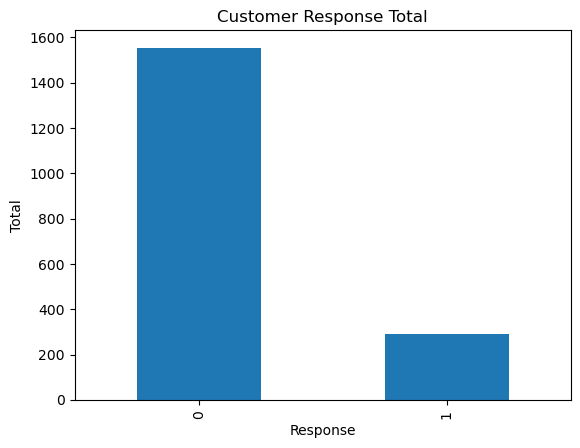

In [24]:
food['Response'].value_counts().plot(kind='bar')
plt.title('Customer Response Total')
plt.xlabel('Response')
plt.ylabel('Total')
plt.show()

# Pearson Correlation

In [25]:
food.corr(method = 'pearson')['accepted_Campaigns'].sort_values(ascending = False)

accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
marital_Status         -0.021551
marital_To

In [26]:
food[food['accepted_Campaigns'] != 0].head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0    58138        0         0       58       635         88              546   
8    30351        1         0       19        14          0               24   
9     5648        1         1       68        28          0                6   
17   76995        0         1       91      1012         80              498   
21   58607        0         1       63       867          0               86   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172                88            88                  3   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
17                0                16           176                  2   
21                0                 0            19                  3   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                 8                   10                  4   
8                 3                    0                  2   
9                 1                    0                  0   
17               11                    4                  9   
21                2                    3                  9   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                   7             0             0             0             0   
8                   9             0             0             0             0   
9                  20             1             0             0             0   
17                  5             0             0             0             1   
21                  8             0             1             0             0   

    AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  \
0              0         0              3         11         1   63   
8              0         0              3         11         1   46   
9              0         0              3         11         0   70   
17             0         0              3         11         0   71   
21             0         0              3         11         0   71   

    Customer_Days  marital_Divorced  marital_Married  marital_Single  \
0            2822                 0                0               3   
8            2547                 0                0               0   
9            2267                 0                0               0   
17           2617                 0                4               0   
21           2712                 0                4               0   

    marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
0                  0              0                   0                0   
8                  2              0                   0                0   
9                  2              0                   0                0   
17                 0              0                   0                0   
21                 0              0                   0                0   

    education_Graduation  education_Master  education_PhD  MntTotal  \
0                      3                 0              0      1529   
8                      0                 0              5        44   
9                      0                 0              5        36   
17                     0                 4              0      1606   
21                     0                 0              5       953   

    MntRegularProds  AcceptedCmpOverall  Total_Children  marital_Status  \
0              1441                   0               0               3   
8                42                   0               1               2   
9                23                   1               2               2   
17             1430                   1               1               4   
21              934                   1               1               4   

   marital_Status

<Axes: >

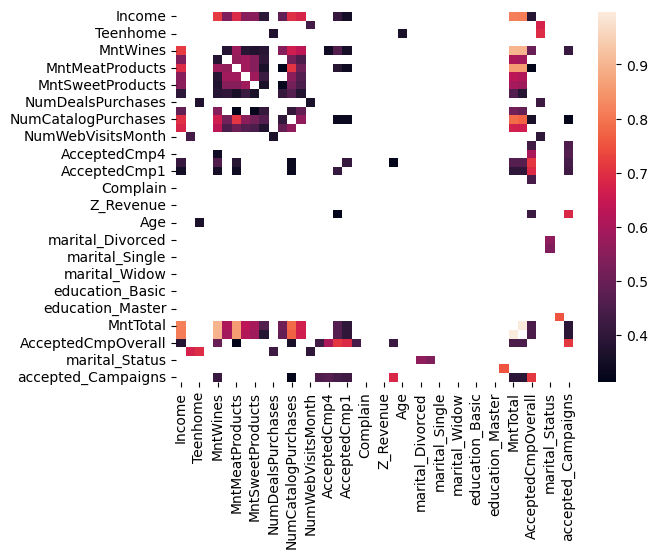

In [27]:
all_correlations = food.corr(method ='pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]

sns.heatmap(all_correlations)

In [28]:
all_correlations['accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

# Assign Age Groups for Graphing & Statistics

In [29]:
age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]


def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

In [30]:
food[['Age','Age_Group']].head()

Age Age_Group
0   63   61 - 70
1   66   61 - 70
2   55   51 - 60
3   36   31 - 40
4   39   31 - 40

In [31]:
counts = food['Age_Group'].value_counts()

In [32]:
percentage = counts / food.shape[0]

In [33]:
percent_food = percentage.reset_index()

In [34]:
percent_food.columns = ['age_group', 'percentage']

In [35]:
percent_food = percent_food.sort_values('age_group')

In [36]:
percent_food

age_group  percentage
5   23 - 30    0.027130
3   31 - 40    0.161693
0   41 - 50    0.332067
1   51 - 60    0.221921
2   61 - 70    0.212154
4   71 - 85    0.045035

# Acceptance of Campaigns

In [37]:
food.groupby('Age_Group')['AcceptedCmpOverall'].sum().reset_index()

Age_Group  AcceptedCmpOverall
0   23 - 30                  31
1   31 - 40                 110
2   41 - 50                 154
3   51 - 60                 113
4   61 - 70                 112
5   71 - 85                  43

In [38]:
food.groupby('Age_Group')['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5'].sum().reset_index()

Age_Group  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0   23 - 30             7             2             7             4   
1   31 - 40            27             3            36            14   
2   41 - 50            32             6            48            38   
3   51 - 60            24             6            20            40   
4   61 - 70            24             5            24            35   
5   71 - 85            10             0             4            15   

   AcceptedCmp5  
0            11  
1            30  
2            30  
3            23  
4            24  
5            14

<Axes: xlabel='Age_Group', ylabel='accepted_Campaigns'>

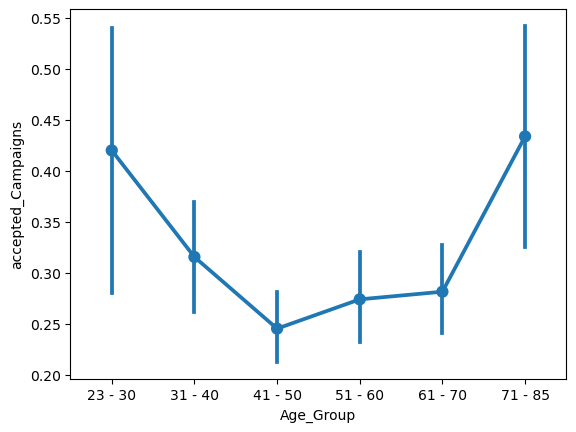

In [39]:
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']

sns.pointplot(data = food, x = 'Age_Group', y = 'accepted_Campaigns', order = age_order )

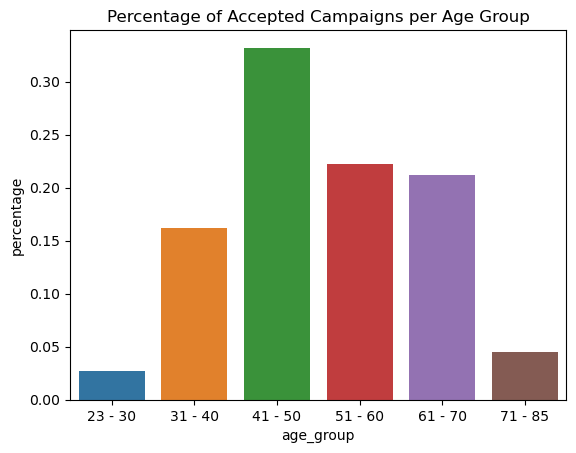

In [40]:
import matplotlib.pyplot as plt

sns.barplot(x = 'age_group', y = 'percentage', data =percent_food)
plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()


Summary of Acceptance of Campaigns
• core audience for accepting more campaigns right now is 41-50 year olds
• Accepted Campaign 2 received the lowest offers 
• The top three age groups for acceptance of campaigns are: 41-50, 51-60 and 61-70.

# Amount Spent/Age Group

In [41]:
food.groupby('Age_Group')['MntTotal'].sum().reset_index()

Age_Group  MntTotal
0   23 - 30     40166
1   31 - 40    135044
2   41 - 50    297347
3   51 - 60    242313
4   61 - 70    249793
5   71 - 85     76828

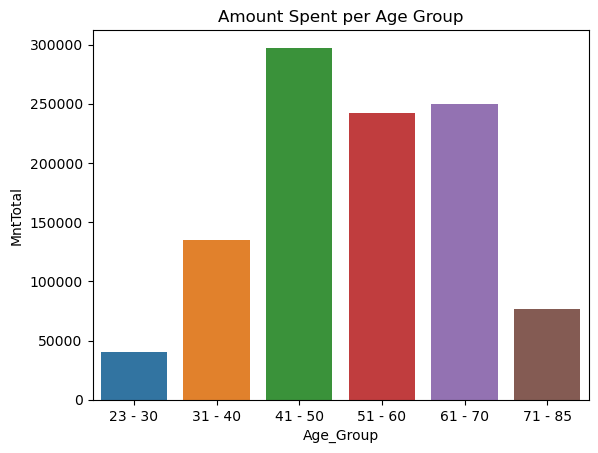

In [42]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data =grouped_food)
plt.title('Amount Spent per Age Group')
plt.show()

Summary of Amount Spent per Age Group
• Core audience spending more money is 41-50
• The top three age groups spending more money are: 41-50, 51-60 and 61-70.

# Amount Spent/Age Group that Accepted Campaign

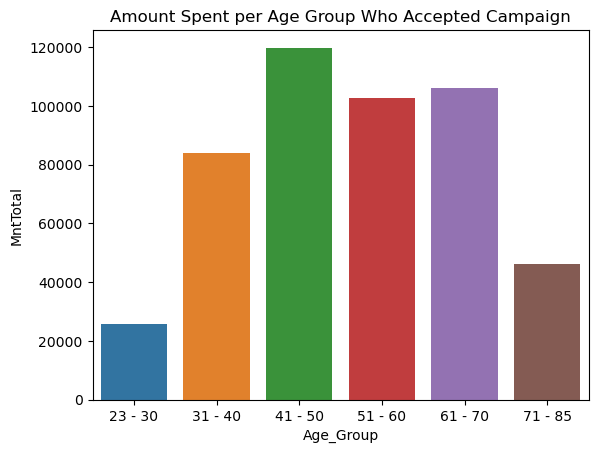

In [43]:
acct_camp = food[food['accepted_Campaigns'] != 0]
grouped_food = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data =grouped_food)
plt.title('Amount Spent per Age Group Who Accepted Campaign')
plt.show()

# Purchases

In [44]:
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sums'])

In [45]:
sum_food = sum_food.reset_index()

In [46]:
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)

In [47]:
sum_food

Type_of_Purchase   Sums
0      NumWebPurchases   7619
1  NumCatalogPurchases   4871
2    NumStorePurchases  10675

<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

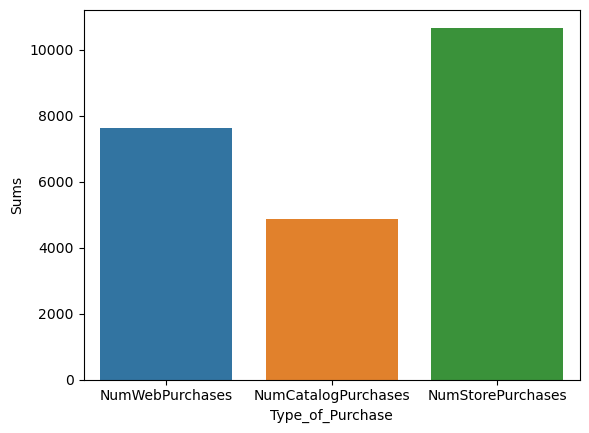

In [48]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food)

<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

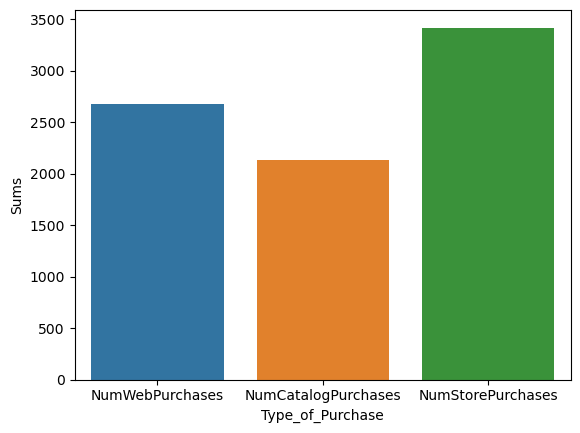

In [51]:
acct_camp = food[food['accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acct_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food)

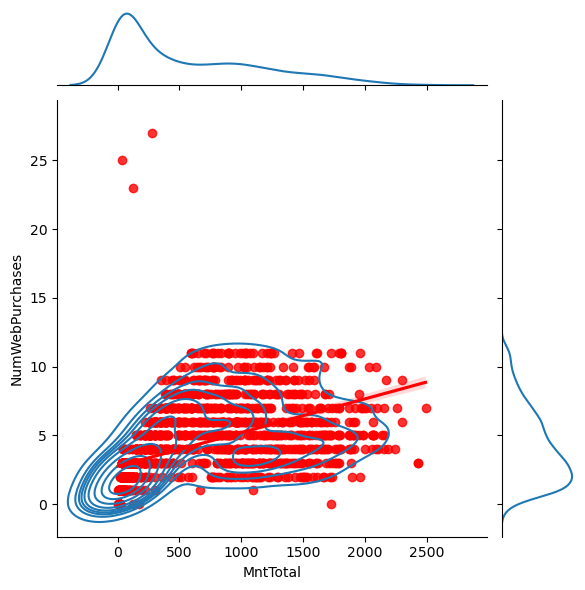

In [52]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot,color = 'red')

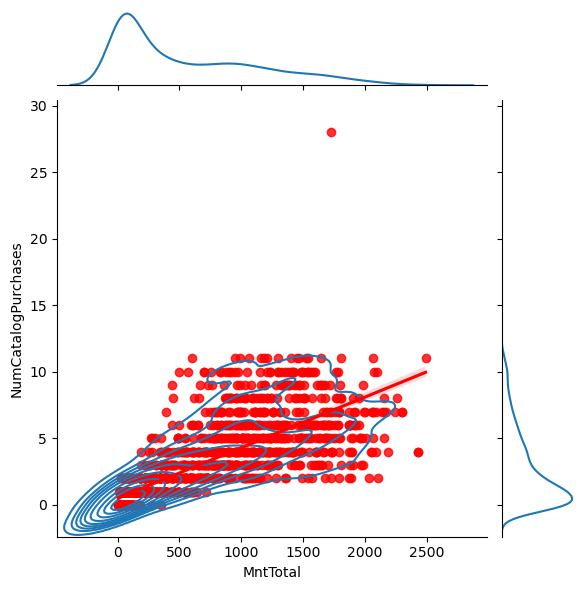

In [53]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot,color = 'red')

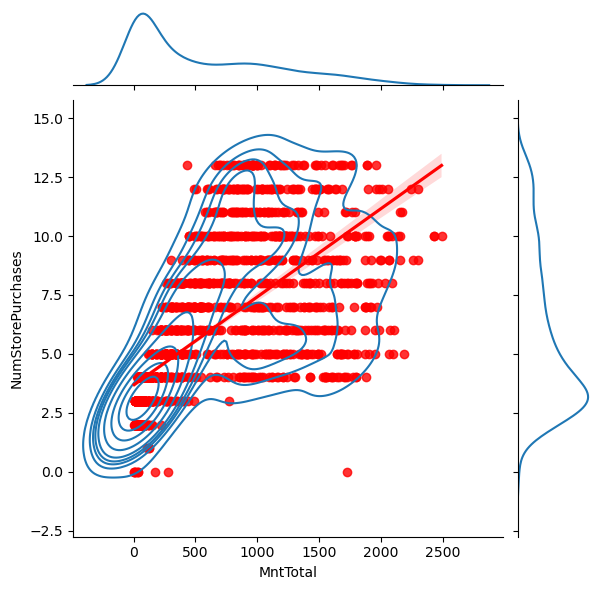

In [54]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot,color = 'red')

Summary of Purchases
• Households spend more money in store
• Catalog pruchases are more likely to accept campaigns
• Households that accept campaigns spend more money in store

# Household w/wo. Children

In [60]:
food.groupby('Total_Children')['MntTotal'].sum().reset_index()

Total_Children  MntTotal
0               0    545437
1               1    407694
2               2     78625
3               3      9735

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

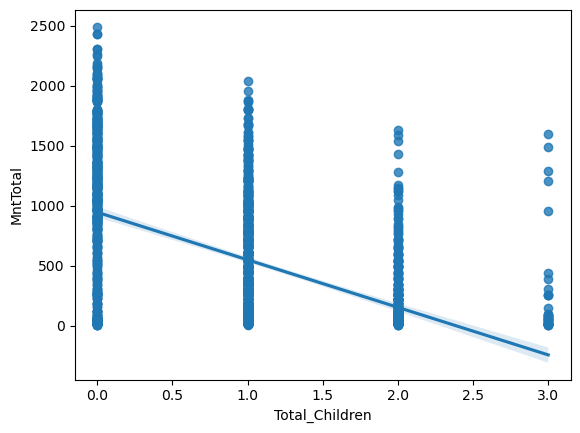

In [55]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

In [59]:
food.groupby('Total_Children')['accepted_Campaigns'].sum().reset_index()

Total_Children  accepted_Campaigns
0               0                 240
1               1                 210
2               2                  69
3               3                   4

<Axes: xlabel='Total_Children', ylabel='accepted_Campaigns'>

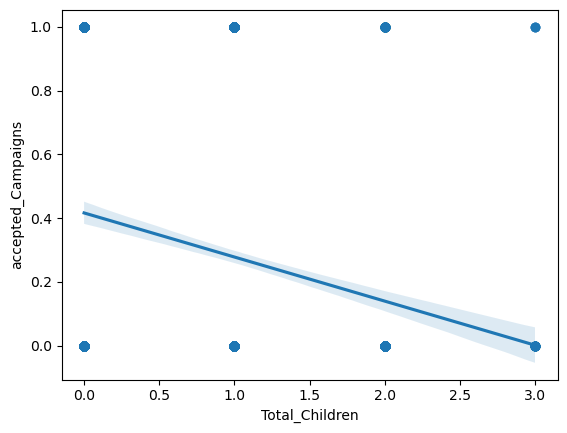

In [56]:
sns.regplot(x = 'Total_Children', y = 'accepted_Campaigns', data = food)

Summary of Households w/wo Children
• Households with no more than 1 child spend more money and accept more campaigns

# Education Status

In [61]:
food.groupby('education_Status')['accepted_Campaigns'].sum().reset_index()

education_Status  accepted_Campaigns
0                 1                  39
1                 2                   5
2                 3                 259
3                 4                  91
4                 5                 129

<Axes: xlabel='education_Status', ylabel='accepted_Campaigns'>

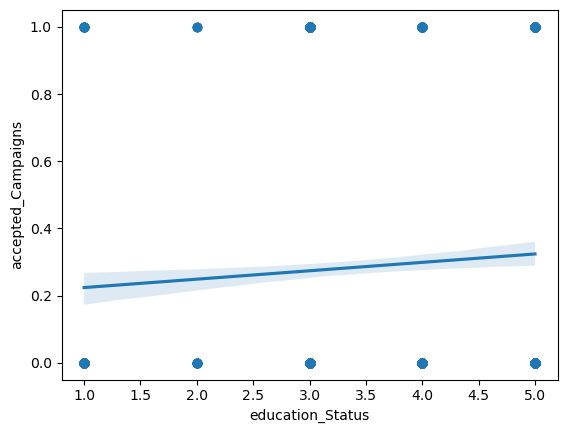

In [57]:
sns.regplot(x = 'education_Status', y = 'accepted_Campaigns', data = food)

In [63]:
food.groupby('education_Status')['MntTotal'].sum().reset_index()

education_Status  MntTotal
0                 1     76458
1                 2      2810
2                 3    531585
3                 4    181016
4                 5    249622

<Axes: xlabel='education_Status', ylabel='MntTotal'>

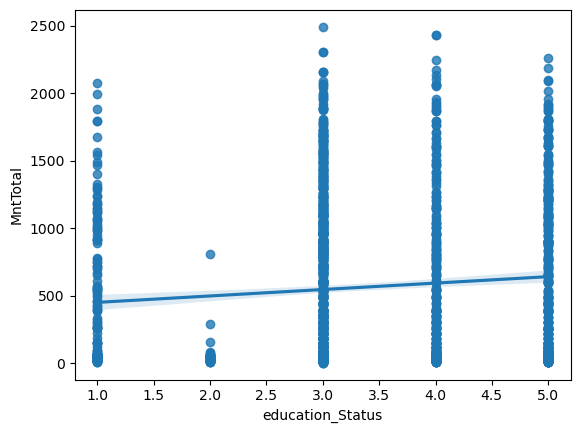

In [62]:
sns.regplot(x = 'education_Status', y = 'MntTotal', data = food)

Summary of Education Status
• Households with a college degree spent more money and accepted more campaigns

# Marital Status

<Axes: xlabel='marital_Status_str', ylabel='count'>

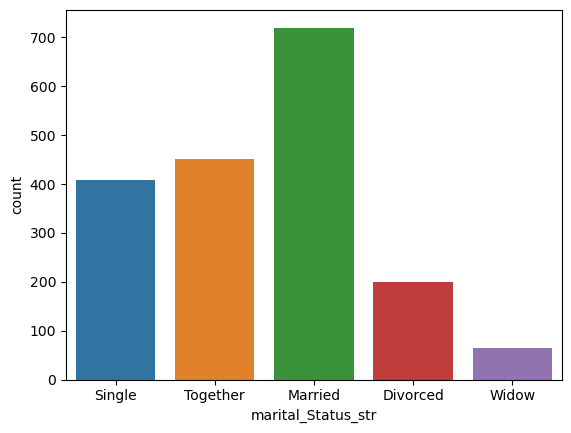

In [64]:
sns.countplot(x = 'marital_Status_str', data = food)

<Axes: xlabel='marital_Status', ylabel='accepted_Campaigns'>

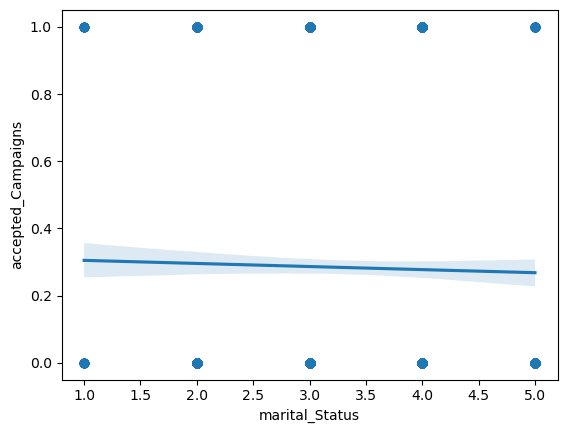

In [80]:
sns.regplot(x = 'marital_Status', y = 'accepted_Campaigns', data = food)

In [67]:
accpt = food[food['accepted_Campaigns'] !=0]

rel_food = accpt.groupby('marital_Status_str')['MntTotal'].sum().reset_index()

In [70]:
food.groupby('marital_Status_str')['MntTotal'].sum().reset_index()

marital_Status_str  MntTotal
0           Divorced    111813
1            Married    397442
2             Single    231616
3           Together    254606
4              Widow     46014

<Axes: xlabel='marital_Status_str', ylabel='MntTotal'>

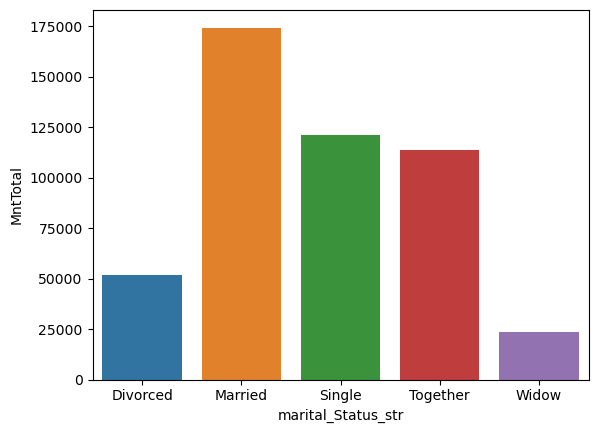

In [68]:
sns.barplot(x = 'marital_Status_str', y = 'MntTotal', data = rel_food )

In [72]:
total = food['marital_Status_str'].value_counts()
accepted = food[food['accepted_Campaigns'] == 1]['marital_Status_str'].value_counts()

In [73]:
per_marital = accepted / total * 100

In [74]:
per_food = per_marital.reset_index()
per_food.columns = ['marital_Status', 'Percentage']

In [82]:
food.groupby('marital_Status_str')['accepted_Campaigns'].mean().reset_index()

marital_Status_str  accepted_Campaigns
0           Divorced            0.286432
1            Married            0.261111
2             Single            0.327628
3           Together            0.266075
4              Widow            0.375000

<Axes: xlabel='marital_Status', ylabel='Percentage'>

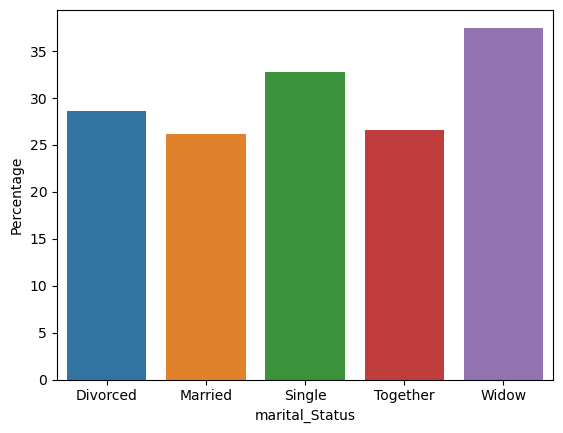

In [75]:
sns.barplot(x= 'marital_Status', y = 'Percentage', data = per_food)

Summary of Marital Status
• Married, Single and Together are spending a lot more money than widow and divorced
• Windows accepted more campaigns than any other marital group

# K-Means for Customer Segmentation

In [92]:
food.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               3                 0   
1                 0                0               3                 0   
2                 0                0               0                 2   
3                 0                0               0                 2   
4                 0                4               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     3   
1              0                   0                0                     3   
2              0                   0                0                     3   
3              0                   0                0                     3   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              5       407              392   

   AcceptedCmpOverall  Total_Children  marital_Status marital_Status_str  \
0                   0               0               3             Single   
1                   0               2               3             Single   
2                   0               0               2           Together   
3                   0               1               2           Together   
4                   0            

In [93]:
cluster = food.iloc[:, [0,36]].values

In [105]:
wcss = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(cluster) 
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Number of k Clusters')

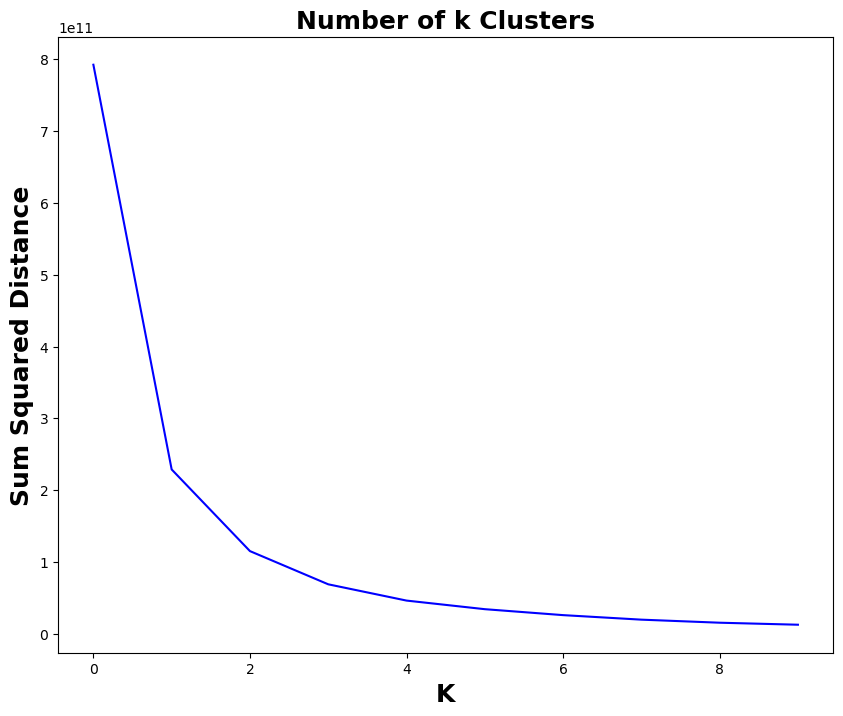

In [107]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(wcss, color = 'blue')
ax.set_xlabel('K', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Sum Squared Distance', fontsize = 18, fontweight = 'bold')

plt.title('Number of k Clusters', fontsize = 18, fontweight = 'bold')

 ## Based off of the elbow shape, the maximum number of clusters is 3

# Train the Model (Part 1)

In [108]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
predict = kmeans.fit_predict(cluster)

In [109]:
kmeans.cluster_centers_

array([[5.15372470e+04, 4.20257440e+02],
       [7.57275424e+04, 1.21240678e+03],
       [2.76653563e+04, 7.53149742e+01]])

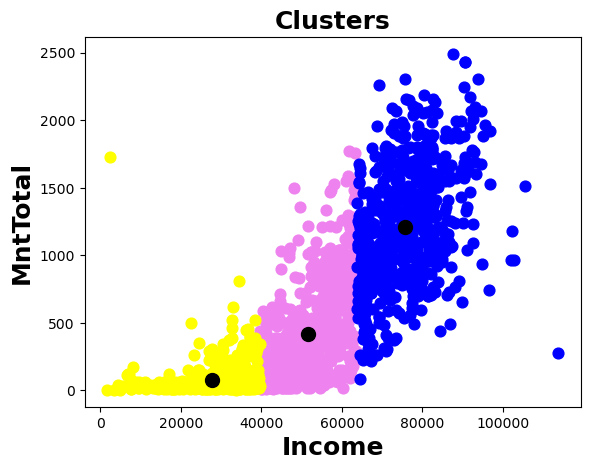

In [115]:
plt.scatter(cluster[predict == 0, 0], cluster[predict == 0, 1], s = 60, c = 'violet', label = 'Cluster1')
plt.scatter(cluster[predict == 1, 0], cluster[predict == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(cluster[predict == 2, 0], cluster[predict == 2, 1], s = 60, c = 'yellow', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Income', fontsize = 18, fontweight = 'bold') 
plt.ylabel('MntTotal', fontsize = 18, fontweight = 'bold') 
plt.title('Clusters', fontsize = 18, fontweight = 'bold') 

plt.show()

## The three different clusters are shown with the three colors. The black centroids are data points at the center of each cluster.

# Cluster Visualization (Part 2) - Coming Soon...